## 목적
- 마케팅 전략 수립을 위한 고객 군집화
- 군집별 고객의 특성 파악

In [1]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비
- 출처
    - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    - 원본 데이터셋의 컬럼명을 한글화 하였음
- 단위
    - 연간소득 : 천달러
    - 소비점수 : 1~100점

In [2]:
df = pd.read_csv("data/쇼핑몰고객군집화.csv")
df.head()

,고객ID,성별,나이,연간소득,소비점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 데이터 전처리

#### 사용할 컬럼 선택

In [3]:
X = df.drop(['고객ID'], axis=1)
X.head()

,성별,나이,연간소득,소비점수
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [369]:
# !pip install plotly
# !pip install nbformat

   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/90.0 kB ? eta -:--:--
   ---------------------------------------- 90.0/90.0 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
   ---------------------------------------- 67.6/67.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/224.0 kB ? eta -:--:--
   ---------------------------------------- 224.0/224.0 kB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [372]:
import plotly.express as px

fig = px.scatter_3d(
    X, x='나이', y='연간소득', z='소비점수',
    color='성별', opacity=0.7, size_max=10
)
fig.update_layout(title="3D: 나이 vs 소득 vs 소비점수")
fig.show(renderer="browser")

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      200 non-null    object
 1   나이      200 non-null    int64 
 2   연간소득    200 non-null    int64 
 3   소비점수    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
# ---------------------------------
# 데이터 유형 구분 - 범주형/수치형
# ---------------------------------

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='number').columns

display(cat_cols)
display(num_cols)

Index(['성별'], dtype='object')

Index(['나이', '연간소득', '소비점수'], dtype='object')

#### 범주형 데이터 인코딩

In [6]:
# -----------------
# 인코더 생성
# -----------------

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# -----------------
# 인코딩
# -----------------

X_encoded = encoder.fit_transform(X[cat_cols])
col_name = encoder.get_feature_names_out()

# -----------------
# 인코딩 결과를 데이터프레임 형태로 만들기
# -----------------

X_encoded = pd.DataFrame(X_encoded, columns=['성별'])
X_encoded

,성별
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
195,0.0
196,0.0
197,1.0
198,1.0


#### 수치형 데이터 스케일링

In [7]:
# -----------------
# 스케일러 생성
# -----------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# -----------------
# 스케일링
# -----------------

X_scaled = scaler.fit_transform(X[num_cols])

# -----------------
# 스케일 된 데이터를 데이터프레임 형태로 만들기
# -----------------

X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
X_scaled

,나이,연간소득,소비점수
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


#### 전처리 완료된 최종 데이터

In [8]:
X_preprocessed = pd.concat([X_encoded, X_scaled], axis=1)
X_preprocessed

,성별,나이,연간소득,소비점수
0,1.0,-1.424569,-1.738999,-0.434801
1,1.0,-1.281035,-1.738999,1.195704
2,0.0,-1.352802,-1.700830,-1.715913
3,0.0,-1.137502,-1.700830,1.040418
4,0.0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.0,-0.276302,2.268791,1.118061
196,0.0,0.441365,2.497807,-0.861839
197,1.0,-0.491602,2.497807,0.923953
198,1.0,-0.491602,2.917671,-1.250054


### 군집화

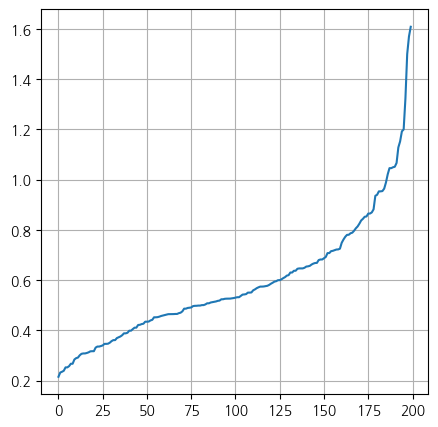

In [375]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(X_preprocessed)
distances, indices = nbrs.kneighbors(X_preprocessed)

distances = np.sort(distances[:, 3])

plt.figure(figsize=(5, 5))
plt.plot(distances)
# plt.yticks(np.arange(0, distances.max() + 0.01, step=0.01))

plt.grid(True)
plt.show()

#### 학습

In [349]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.723, min_samples=6)

model.fit(X_preprocessed)

df['군집'] = model.labels_
df['군집'].value_counts()

군집
 0    90
-1    45
 2    24
 4    15
 3    11
 5     9
 1     6
Name: count, dtype: int64

In [350]:
# !pip install hdbscan

In [376]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=3)
labels = clusterer.fit_predict(X_preprocessed)
labels = pd.DataFrame(labels, columns=['군집'])

df['군집'] = labels
df['군집'].value_counts()


c:\Users\EL91\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\EL91\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



군집
 5    60
-1    52
 0    36
 4    18
 3    15
 2    11
 1     8
Name: count, dtype: int64

### 군집결과

In [352]:
df.groupby(by='군집')['고객ID'].count()

군집
-1    45
 0    90
 1     6
 2    24
 3    11
 4    15
 5     9
Name: 고객ID, dtype: int64

#### 군집별 데이터 수

In [353]:
df.groupby(by='군집')['고객ID'].count()

군집
-1    45
 0    90
 1     6
 2    24
 3    11
 4    15
 5     9
Name: 고객ID, dtype: int64

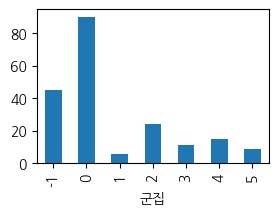

In [354]:
df.groupby(by='군집')['고객ID'].count().plot(kind='bar', figsize=(3,2))
pass

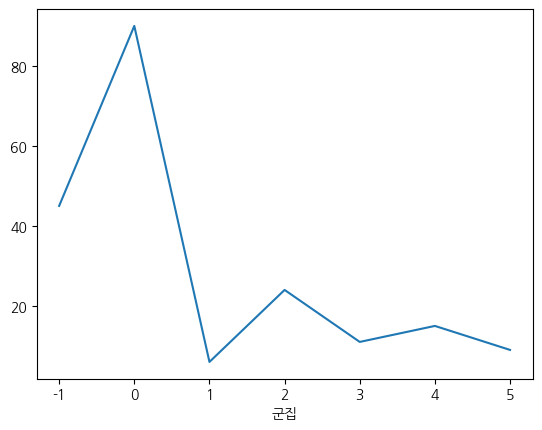

In [355]:
df.groupby(by='군집')['고객ID'].count().plot()
pass

#### 연속형 변수 시각화

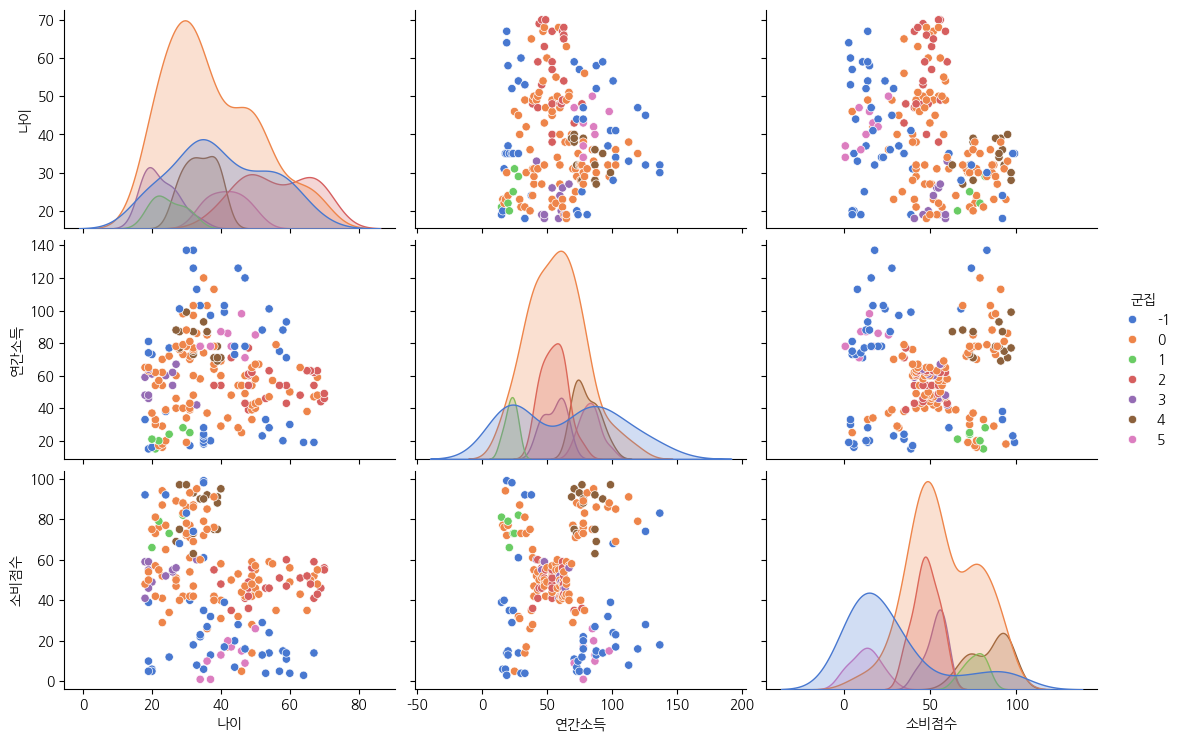

In [356]:
# -------------------
# 연속형 변수 시각화
# -------------------

sns.pairplot(df.iloc[:,1:], hue='군집', palette='muted', height=2.5, aspect=1.5)
pass

#### 범주형 변수 시각화

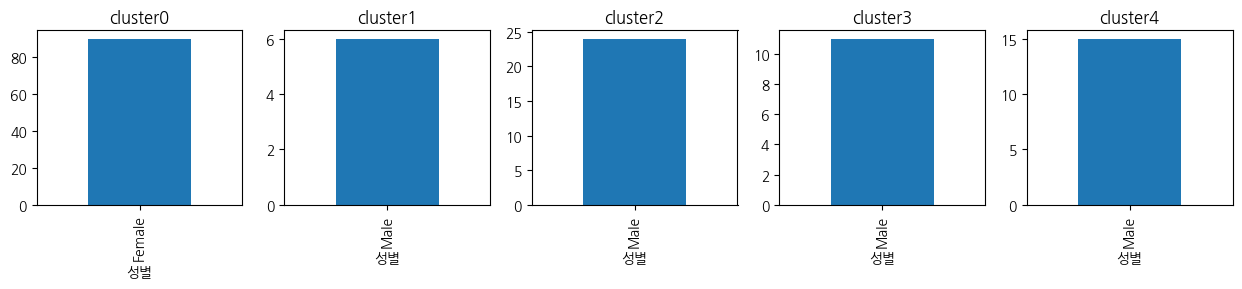

In [357]:
# -----------------------------
# 성별 빈도수 시각화
# -----------------------------

k = 5

plt.figure(figsize=(15,3))

for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["군집"]==i, "성별"].value_counts().plot(kind="bar", title=f"cluster{i}")

plt.tight_layout()

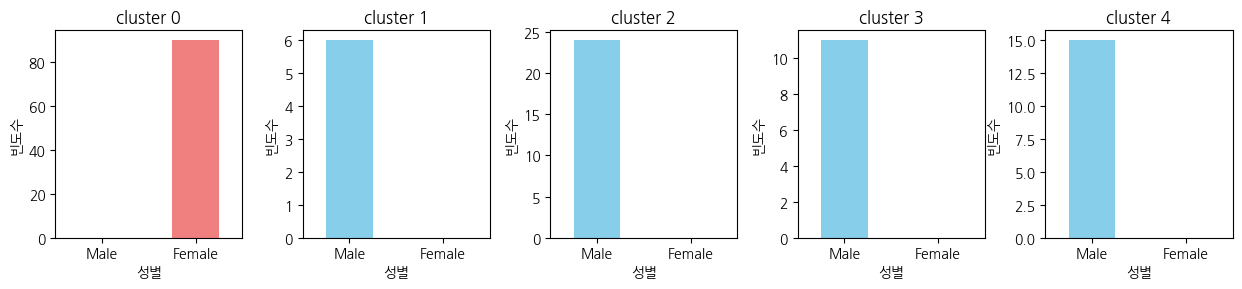

In [358]:
import matplotlib.pyplot as plt
 
# 예시: 성별 컬럼의 고정 순서 지정
order = ["Male", "Female"]  
colors = ["skyblue", "lightcoral"]
 
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
   
    # 순서 고정 후 plot
    counts = df.loc[df["군집"]==i, "성별"].value_counts().reindex(order)
    counts.plot(kind="bar", color=colors, title=f"cluster {i}")
 
    plt.xlabel("성별")
    plt.ylabel("빈도수")
    plt.xticks(rotation=0)
 
plt.tight_layout()
plt.show()

#### 특성-군집 분석

In [359]:
# -----------------------------
# 클러스터별 남성의 비율
# -----------------------------

df['성별_이진'] = df['성별'].map({'Male':1, 'Female':0})

df.groupby(by='군집')['성별_이진'].mean().sort_values(ascending=False)

군집
 1    1.000000
 3    1.000000
 2    1.000000
 4    1.000000
 5    1.000000
-1    0.511111
 0    0.000000
Name: 성별_이진, dtype: float64

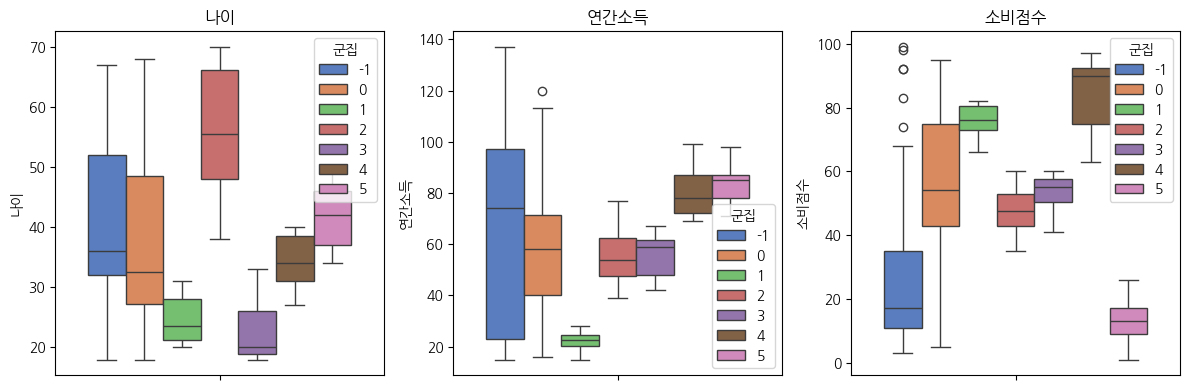

In [360]:
# -----------------------------
# "나이", "연간소득(천달러)", "소비점수(1-100)"
# -----------------------------

fig, ax = plt.subplots(1, 3, figsize=(12,4))

for i, col in enumerate(num_cols) :
    sns.boxplot(y=col, data=df, ax=ax[i], hue='군집', palette='muted')
    ax[i].set_title(col)

plt.tight_layout()

In [361]:
# -------------------
# 군집별 연령 범위
# -------------------

df.groupby(by='군집')['나이'].agg(['min','max'])

,min,max
군집,,
-1,18,67
0,18,68
1,20,31
2,38,70
3,18,33
4,27,40
5,34,50


In [69]:
# -------------------
# 군집별 연간소득 범위 
# -------------------

df.groupby(by='군집')['연간소득'].agg(['min','max'])

,min,max
군집,,
-1,15,137
0,15,38
1,16,120
2,23,98
3,46,101
4,73,103


In [70]:
# -------------------
# 군집별 소비점수 범위 
# -------------------

df.groupby(by='군집')['소비점수'].agg(['min','max'])

,min,max
군집,,
-1,3,99
0,61,92
1,5,95
2,1,60
3,41,97
4,5,39


### 결론

KNN 알고리즘으로 엘보우도 그려보고 HDBSCAN 이라는, 엡실론을 알아서 최적으로 맞춰주는 라이브러리 등을 사용해봤지만

고객 세그멘테이션 데이터는 밀도가 비슷하고 군집이 구형으로 되어있는 형태여서 DBSCAN 방식으로는 군집화가 잘 수행되지 않는것으로 판단을 내림.

그냥 k=6 으로 하고 수행한 K-means 알고리즘이 훨씬 결과가 좋은듯

<br>

<hr/>

결론 - 데이터 분포 형태에 따라서 군집화 알고리즘을 잘 선택하자